## Feature selection results for drug response binary classification

TODO: more explain

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

%load_ext autoreload
%autoreload 2

In [2]:
# analysis of results generated by script:
# 08_cell_line_classification/run_drug_response_prediction.py
# (with varying feature_selection parameters)

# single_cancer_dir = os.path.join('results', 'drug_response_binary', 'single_cancer')
# pancancer_dir = os.path.join('results', 'drug_response_binary_all', 'pancancer')
# pancancer_only_dir = os.path.join('results', 'drug_response_binary_all', 'all_other_cancers')

single_cancer_dir = os.path.join('results', 'drug_response_binary_liquid_or_solid', 'single_cancer')
pancancer_dir = os.path.join('results', 'drug_response_binary_liquid_or_solid', 'pancancer')
pancancer_only_dir = os.path.join('results', 'drug_response_binary_liquid_or_solid', 'all_other_cancers')

n_dims = [100, 250, 500, 1000, 5000]

fs_methods = [
    'mad',
    'pancan_f_test',
    'median_f_test',
    'random'
]

# drug to plot results for
drug = 'Paclitaxel'

# metric to plot results for
metric = 'aupr'
delta_metric = 'delta_{}'.format(metric)

# location to save plots to
output_plots = False
if metric == 'auroc':
    output_plots_dir = cfg.ccle_fs_plots_dir / 'drug_response_binary' / 'auroc'
else:
    output_plots_dir = cfg.ccle_fs_plots_dir / 'drug_response_binary'

### Load results

We load the results of the single cancer, pan-cancer, and "pan-cancer only" (aka "all other cancers") experiments here.

In [3]:
single_cancer_df = au.load_prediction_results_fs(
    single_cancer_dir, cfg.fs_methods
)
single_cancer_df = single_cancer_df[single_cancer_df.n_dims.isin(n_dims)].copy()
single_cancer_df['train_set'] = 'single_cancer'

for n in n_dims:
    for fs_method in fs_methods:
        single_cancer_df.loc[
            (single_cancer_df.fs_method == fs_method) & (single_cancer_df.n_dims == n),
            'fs_method'
        ] = '{}.{}'.format(fs_method, n)

single_cancer_df.rename(columns={'gene': 'drug'}, inplace=True)

print(np.unique(single_cancer_df.seed))
print(np.unique(single_cancer_df.n_dims))
print(np.unique(single_cancer_df.fs_method))
print(single_cancer_df.shape)
single_cancer_df.head()

[ 1 42]
[ 100  250  500 1000 5000]
['mad.100' 'mad.1000' 'mad.250' 'mad.500' 'mad.5000' 'median_f_test.100'
 'median_f_test.1000' 'median_f_test.250' 'median_f_test.500'
 'median_f_test.5000' 'pancan_f_test.100' 'pancan_f_test.1000'
 'pancan_f_test.250' 'pancan_f_test.500' 'pancan_f_test.5000' 'random.100'
 'random.1000' 'random.250' 'random.500' 'random.5000']
(7680, 11)


,auroc,aupr,drug,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,1.00000,1.00000,Erlotinib,liquid,shuffled,42,train,0,mad.250,250,single_cancer
1,0.12500,0.17143,Erlotinib,liquid,shuffled,42,test,0,mad.250,250,single_cancer
2,0.64348,0.28333,Erlotinib,liquid,shuffled,42,cv,0,mad.250,250,single_cancer
3,1.00000,1.00000,Erlotinib,liquid,shuffled,42,train,1,mad.250,250,single_cancer
4,0.31250,0.21111,Erlotinib,liquid,shuffled,42,test,1,mad.250,250,single_cancer


In [4]:
pancancer_df = au.load_prediction_results_fs(
    pancancer_dir, cfg.fs_methods
)
pancancer_df = pancancer_df[pancancer_df.n_dims.isin(n_dims)].copy()
pancancer_df['train_set'] = 'pancancer'

for n in n_dims:
    for fs_method in fs_methods:
        pancancer_df.loc[
            (pancancer_df.fs_method == fs_method) & (pancancer_df.n_dims == n),
            'fs_method'
        ] = '{}.{}'.format(fs_method, n)
        
pancancer_df.rename(columns={'gene': 'drug'}, inplace=True)

print(np.unique(pancancer_df.seed))
print(np.unique(pancancer_df.fs_method))
print(pancancer_df.shape)
pancancer_df.head()

[ 1 42]
['mad.100' 'mad.1000' 'mad.250' 'mad.500' 'mad.5000' 'median_f_test.100'
 'median_f_test.1000' 'median_f_test.250' 'median_f_test.500'
 'median_f_test.5000' 'pancan_f_test.100' 'pancan_f_test.1000'
 'pancan_f_test.250' 'pancan_f_test.500' 'pancan_f_test.5000' 'random.100'
 'random.1000' 'random.250' 'random.500' 'random.5000']
(11520, 11)


,auroc,aupr,drug,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,0.94103,0.76492,Erlotinib,liquid,shuffled,42,train,0,mad.250,250,pancancer
1,0.45614,0.17879,Erlotinib,liquid,shuffled,42,test,0,mad.250,250,pancancer
2,0.62802,0.32628,Erlotinib,liquid,shuffled,42,cv,0,mad.250,250,pancancer
3,0.79579,0.52824,Erlotinib,liquid,shuffled,42,train,1,mad.250,250,pancancer
4,0.33333,0.15132,Erlotinib,liquid,shuffled,42,test,1,mad.250,250,pancancer


In [5]:
pancancer_only_df = au.load_prediction_results_fs(
    pancancer_only_dir, cfg.fs_methods
)
pancancer_only_df = pancancer_only_df[pancancer_only_df.n_dims.isin(n_dims)].copy()
pancancer_only_df['train_set'] = 'pancancer_only'

for n in n_dims:
    for fs_method in fs_methods:
        pancancer_only_df.loc[
            (pancancer_only_df.fs_method == fs_method) & (pancancer_only_df.n_dims == n),
            'fs_method'
        ] = '{}.{}'.format(fs_method, n)
        
pancancer_only_df.rename(columns={'gene': 'drug'}, inplace=True)

print(np.unique(pancancer_only_df.seed))
print(np.unique(pancancer_only_df.fs_method))
print(pancancer_only_df.shape)
pancancer_only_df.head()

[ 1 42]
['mad.100' 'mad.1000' 'mad.250' 'mad.500' 'mad.5000' 'median_f_test.100'
 'median_f_test.1000' 'median_f_test.250' 'median_f_test.500'
 'median_f_test.5000' 'pancan_f_test.100' 'pancan_f_test.1000'
 'pancan_f_test.250' 'pancan_f_test.500' 'pancan_f_test.5000' 'random.100'
 'random.1000' 'random.250' 'random.500' 'random.5000']
(9600, 11)


,auroc,aupr,drug,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,0.69658,0.42860,Erlotinib,liquid,shuffled,42,train,0,mad.250,250,pancancer_only
1,0.22807,0.11461,Erlotinib,liquid,shuffled,42,test,0,mad.250,250,pancancer_only
2,0.60684,0.29868,Erlotinib,liquid,shuffled,42,cv,0,mad.250,250,pancancer_only
3,0.69658,0.42860,Erlotinib,liquid,shuffled,42,train,1,mad.250,250,pancancer_only
4,0.29825,0.16212,Erlotinib,liquid,shuffled,42,test,1,mad.250,250,pancancer_only


In [6]:
# get difference between true and shuffled models, split by
# feature selection method and holdout cancer type
def compare_from_experiment(experiment_df):
    compare_df = []
    for fs_method in experiment_df.fs_method.unique():
        for holdout_cancer_type in experiment_df.holdout_cancer_type.unique():
            compare_df.append(
                au.compare_control_ind(
                    experiment_df[
                        (experiment_df.fs_method == fs_method) &
                        (experiment_df.holdout_cancer_type == holdout_cancer_type)
                    ], identifier='drug', metric=metric, verbose=True)
                  .assign(fs_method=fs_method,
                          holdout_cancer_type=holdout_cancer_type)
            )
    return pd.concat(compare_df)
    
single_cancer_compare_df = compare_from_experiment(single_cancer_df)
pancancer_compare_df = compare_from_experiment(pancancer_df)
pancancer_only_compare_df = compare_from_experiment(pancancer_only_df)

print(single_cancer_compare_df.shape,
      pancancer_compare_df.shape,
      pancancer_only_compare_df.shape)

(1280, 6) (1920, 6) (1600, 6)


In [7]:
# split fs_method and n_dims so we can make a line plot
# over different values of n_dims
for compare_df in [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]:
    compare_df[['fs_method', 'n_dims']] = compare_df.fs_method.str.split('.', 1, expand=True)
    compare_df['n_dims'] = compare_df.n_dims.astype(int)

In [8]:
print(single_cancer_compare_df.fs_method.unique())
print(single_cancer_compare_df.n_dims.unique())
single_cancer_compare_df.head()

['mad' 'random' 'median_f_test' 'pancan_f_test']
[ 250  100 1000  500 5000]


,identifier,seed,fold,delta_aupr,fs_method,holdout_cancer_type,n_dims
0,Cisplatin,42,0,0.09019,mad,liquid,250
1,Cisplatin,42,1,-0.20565,mad,liquid,250
2,Cisplatin,42,2,0.09391,mad,liquid,250
3,Cisplatin,42,3,0.12090,mad,liquid,250
4,Cisplatin,1,0,-0.38597,mad,liquid,250


### Plot average performance across cancer types and number of features selected

In [9]:
print(single_cancer_compare_df.identifier.unique())

['Cisplatin' 'EGFRi' 'Erlotinib' 'Cetuximab' 'Docetaxel']


In [10]:
print(single_cancer_compare_df.fs_method.unique())

['mad' 'random' 'median_f_test' 'pancan_f_test']


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

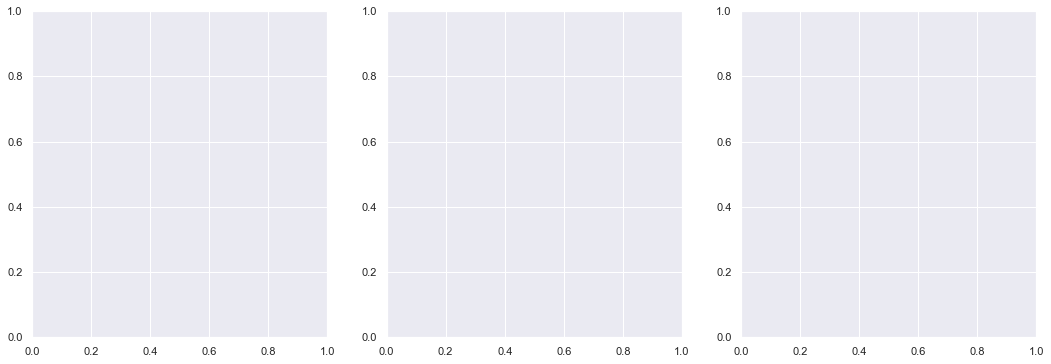

In [11]:
sns.set({'figure.figsize': (18, 6)})
sns.set_context('notebook')

fig, axarr = plt.subplots(1, 3)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

fs_method_order = [
    'mad',
    'pancan_f_test',
    'median_f_test',
    'random'
]


for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    # averaged over cancer types
    plot_df = (compare_df[(compare_df.identifier == drug)]
      .sort_values(by='n_dims', ascending=True)
    )
    sns.pointplot(data=plot_df, x='n_dims', y=delta_metric, hue='fs_method',
                  hue_order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{}, averaged over all holdout cancer types'.format(drug))
plt.tight_layout()

print(plot_df.holdout_cancer_type.unique(), file=sys.stderr)

if output_plots:
    output_plots_dir.mkdir(exist_ok=True)
    plt.savefig(output_plots_dir / '{}_response_classify_summary.png'.format(drug),
                dpi=200, bbox_inches='tight')

In [ ]:
sns.set({'figure.figsize': (16, 12)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 1)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

# max_n_dims = max(n_dims)
max_n_dims = 1000

# split individual cancer types
for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    plot_df = (compare_df[(compare_df.identifier == drug) &
                          (compare_df.n_dims == max_n_dims)]
      .sort_values(by='holdout_cancer_type')
    )
    sns.boxplot(data=plot_df, x='holdout_cancer_type', 
                y=delta_metric, hue='fs_method', 
                hue_order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    if ix == len(dfs_to_plot) - 1:
        ax.set_xlabel('Holdout cancer type')
    else:
        ax.set_xlabel('')
        ax.get_legend().remove()
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{}, {} features, by test cancer type'.format(drug, max_n_dims), y=0.99)
plt.tight_layout()

if output_plots:
    plt.savefig(output_plots_dir / '{}_response_classify_by_cancer_type.png'.format(drug),
                dpi=200, bbox_inches='tight')